<a href="https://colab.research.google.com/github/priyanshu7466/Python/blob/main/ML/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [208]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [209]:
df = pd.read_csv('/content/home_price.csv')
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


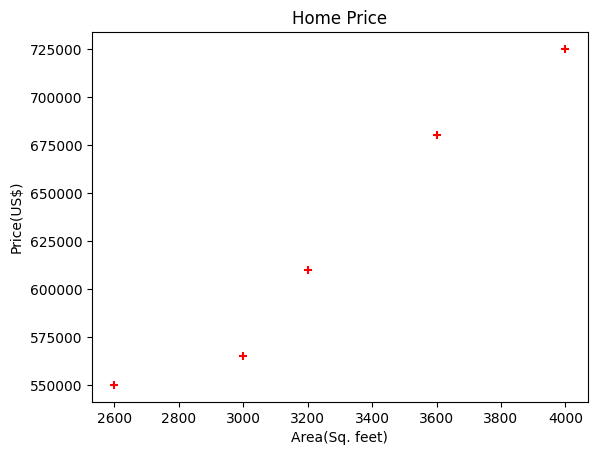

In [210]:
plt.xlabel("Area(Sq. feet)")
plt.ylabel("Price(US$)")
plt.title("Home Price")
plt.scatter(df.area,df.price,color='red',marker='+')

In [211]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [212]:
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [213]:
reg.coef_

array([135.78767123])

In [214]:
reg.intercept_

180616.43835616432

In [215]:
135.78767123*3300+180616.43835616432

628715.7534151643

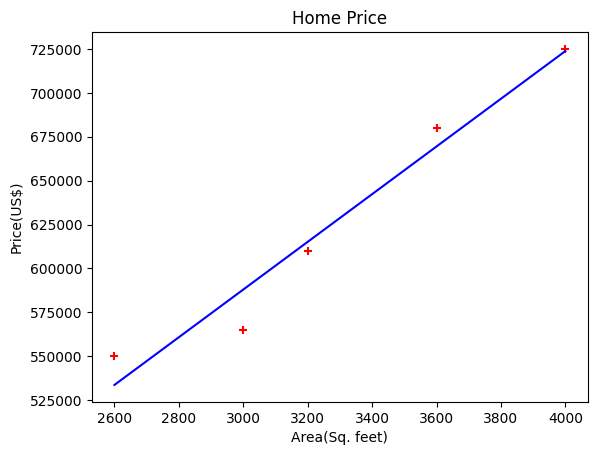

In [216]:
plt.xlabel("Area(Sq. feet)")
plt.ylabel("Price(US$)")
plt.title("Home Price")
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [217]:
d = pd.read_csv('/content/areas.csv')
d.head(3)

,area
0,1000
1,1500
2,2300


In [218]:
p = reg.predict(d)

In [219]:
d['prices'] = p

In [220]:
d.to_csv('/content/prediction.csv',index=False)

### Canada Per Capita Income Prediction

In [221]:
given_data = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv")
given_data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


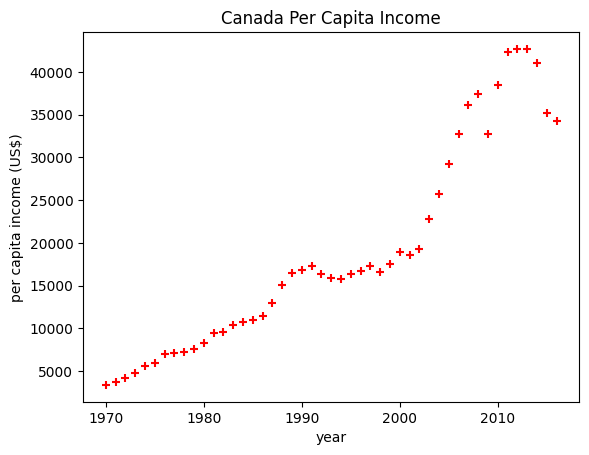

In [222]:
plt.xlabel("year")
plt.ylabel("per capita income (US$)")
plt.title("Canada Per Capita Income")
plt.scatter(given_data['year'],given_data['per capita income (US$)'],color='red',marker='+')

In [223]:
regg = linear_model.LinearRegression()
regg.fit(given_data[['year']],given_data['per capita income (US$)'])

LinearRegression()

In [224]:
regg.predict([[2020]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

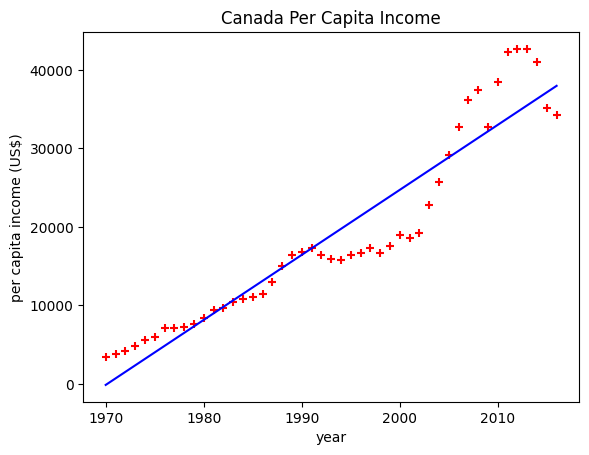

In [225]:
plt.xlabel("year")
plt.ylabel("per capita income (US$)")
plt.title("Canada Per Capita Income")
plt.scatter(given_data['year'],given_data['per capita income (US$)'],color='red',marker='+')
plt.plot(given_data['year'],regg.predict(given_data[['year']]),color='blue')

In [226]:
regg.coef_

array([828.46507522])

In [227]:
regg.intercept_

-1632210.7578554575

In [228]:
# y=m*x + b
828.46507522*2020 + (-1632210.7578554575) # matches with the predicted value

41288.694088942604

## Linear Regression(Multiple Variables)

In [229]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/homeprices.csv")
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [230]:
import math
bedrooms_median = df.bedrooms.median()
bedrooms_median

4.0

In [231]:
df.bedrooms = df.bedrooms.fillna(bedrooms_median)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [232]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [233]:
reg.predict([[3000,3,40]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [234]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [235]:
reg.intercept_

221323.00186540396

In [236]:
reg.predict([[3000,3,15]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([579201.19929613])

In [237]:
reg.predict([[2500,4,5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

In [238]:
d = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv")
d.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [239]:
test_score_median = d['test_score(out of 10)'].median()
test_score_median

8.0

In [240]:
d['test_score(out of 10)'] = d['test_score(out of 10)'].fillna(test_score_median)
d['experience'] = d['experience'].fillna(0).astype(str)
d["experience"]=[w2n.word_to_num(x) for x in d.experience]
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [241]:
regg = linear_model.LinearRegression()
regg.fit(d[['experience','test_score(out of 10)','interview_score(out of 10)']],d['salary($)'])

LinearRegression()

In [242]:
regg.predict([[2,9,6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [243]:
regg.predict([[12,10,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])